In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
mes_df = pd.read_csv('MES_0622.csv')
mes_df.shape

(123710, 6)

# Exploratory Data Analysis

In [3]:
mes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  123710 non-null  object 
 1   Time     123710 non-null  object 
 2   Balance  123710 non-null  object 
 3   Product  123710 non-null  object 
 4   Value    123710 non-null  float64
 5   Unit     123710 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.7+ MB


In [4]:
mes_df.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,1/6/2022,Net Electricity Production,Electricity,22902.2860,GWh
1,Australia,1/6/2022,Net Electricity Production,Total Combustible Fuels,15745.8102,GWh
2,Australia,1/6/2022,Net Electricity Production,"Coal, Peat and Manufactured Gases",10236.5862,GWh
3,Australia,1/6/2022,Net Electricity Production,Oil and Petroleum Products,340.3700,GWh
4,Australia,1/6/2022,Net Electricity Production,Natural Gas,4915.8613,GWh


In [5]:
mes_df['Country'].nunique()

53

In [6]:
mes_df['Product'].value_counts()

Electricity                                   35658
Total Combustible Fuels                        7098
Total Renewables (Geo, Solar, Wind, Other)     7098
Oil and Petroleum Products                     7020
Hydro                                          7016
Combustible Renewables                         6988
Wind                                           6988
Natural Gas                                    6918
Solar                                          6826
Coal, Peat and Manufactured Gases              6611
Other Combustible Non-Renewables               6370
Not Specified                                  5547
Nuclear                                        5249
Geothermal                                     4812
Other Renewables                               3511
Name: Product, dtype: int64

There are 53 countries in the dataset

In [7]:
mes_df['Time'].max()

'1/9/2021'

In [8]:
#converting Time to datetime format
mes_df['Time'] = pd.to_datetime(mes_df['Time'])

In [9]:
mes_df['Product'].nunique()

15

In [10]:
mes_df['Balance'].nunique()

6

In [33]:
def country_search(country_list, df):
    """
    This method searches a dataframe column,
    for countries in a list
    """
    for country in country_list:
        for i in range(len(df.Country)):
            if mes_df.Country[i] == country:
                print(country + ' found')
                break
            else:
                continue

In [35]:
country_list = ['Ireland', "People's Republic of China", 'United Kingdom', 'Germany', 'Norway']
country_search(country_list,mes_df)

Ireland found
People's Republic of China found
United Kingdom found
Germany found
Norway found


Creating a dataframe of countries in the list only.

In [36]:
countries_df = mes_df[mes_df['Country'].isin(country_list)]
countries_df['Country'].nunique()

5

In [50]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12426 entries, 185 to 123591
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  12426 non-null  object        
 1   Time     12426 non-null  datetime64[ns]
 2   Balance  12426 non-null  object        
 3   Product  12426 non-null  object        
 4   Value    12426 non-null  float64       
 5   Unit     12426 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 937.6+ KB


1. How does Ireland compared to other countries in terms of Electricity production vs consumption?

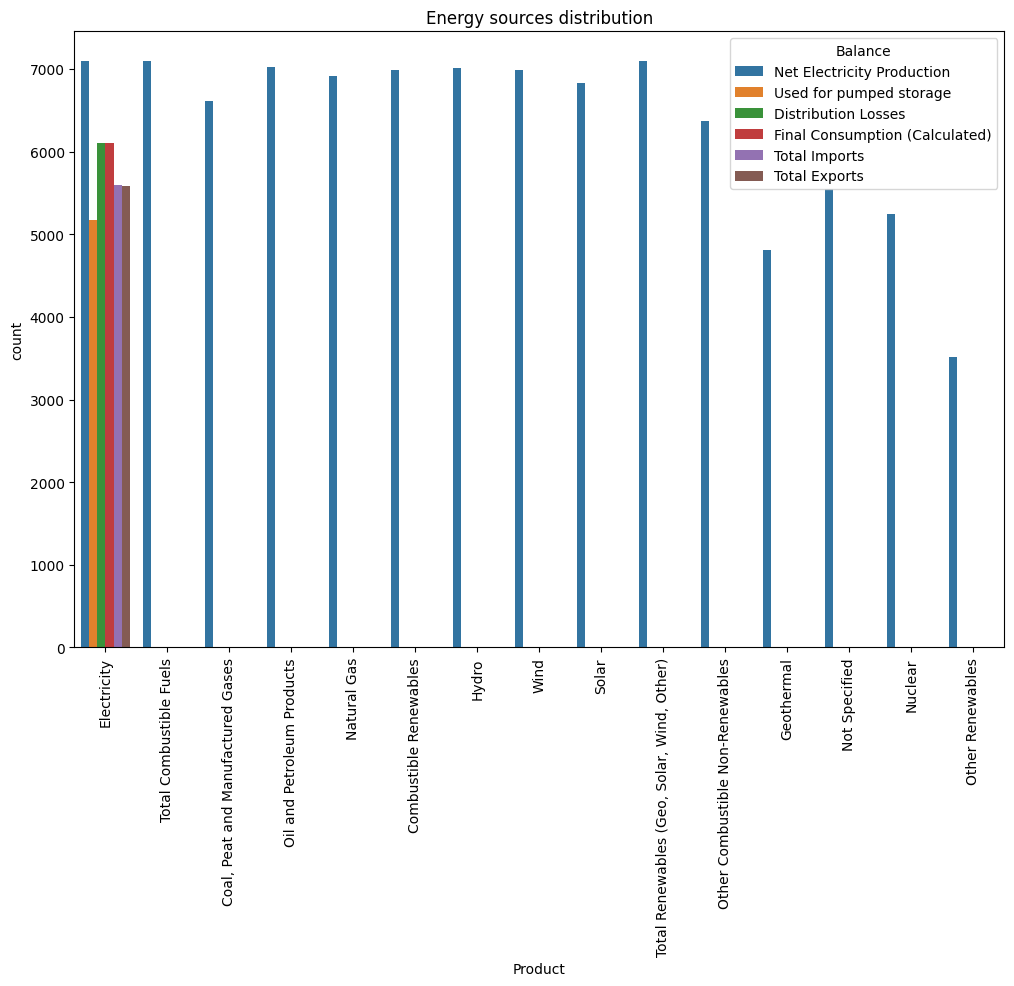

In [30]:
plt.figure(figsize=(12,8))
plt.title("Energy sources distribution")
plt.xlabel("Energy Sources")
# base_color = sns.color_palette()[0]
sns.countplot(
    data = mes_df,
    x = 'Product',
    hue='Balance'
    # color=base_color
);
plt.xticks(rotation=90);

It seems Electricity Product values sum all other sources?

Separate dataframes for the following countries to compare with Ireland:

* China
* United Kingdom
* Germany
* Norway

In [37]:
countries_df['Balance'].value_counts()

Net Electricity Production        9426
Total Imports                      600
Total Exports                      600
Used for pumped storage            600
Distribution Losses                600
Final Consumption (Calculated)     600
Name: Balance, dtype: int64

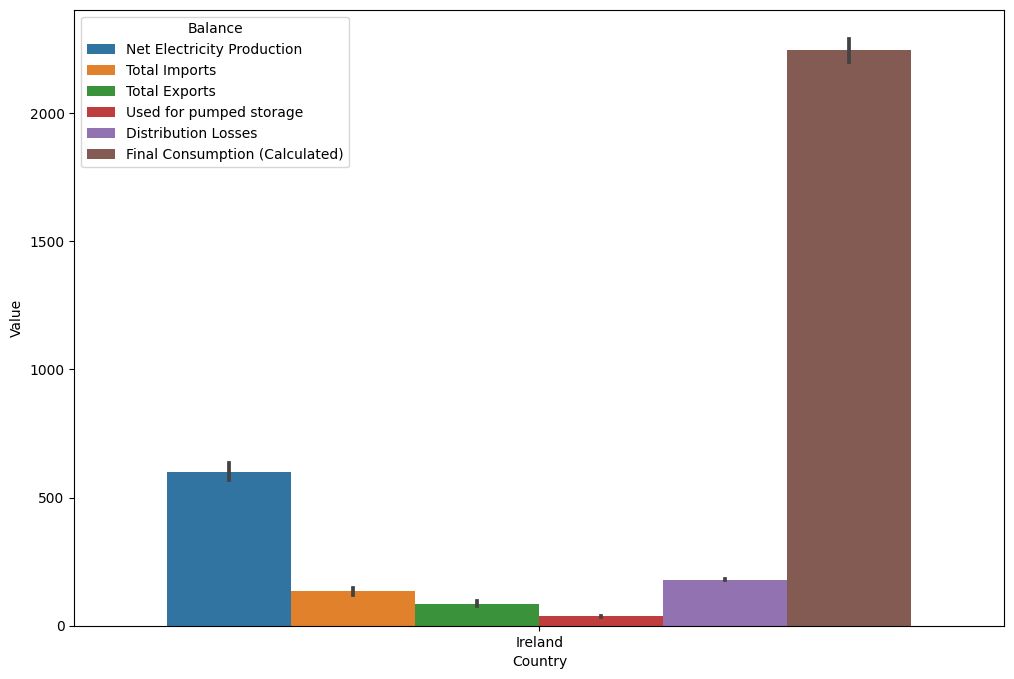

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(
    data = countries_df[countries_df['Country'] == 'Ireland'],
    x = 'Country',
    y = 'Value',
    hue = 'Balance'
);


In [43]:
#filtering for electricity values
elec_countries_df = countries_df[countries_df['Product'] == 'Electricity']
elec_countries_df.head()

,Country,Time,Balance,Product,Value,Unit
185,Germany,2022-01-06,Net Electricity Production,Electricity,42096.4717,GWh
199,Germany,2022-01-06,Total Imports,Electricity,4700.2535,GWh
200,Germany,2022-01-06,Total Exports,Electricity,4761.8730,GWh
201,Germany,2022-01-06,Used for pumped storage,Electricity,563.5029,GWh
202,Germany,2022-01-06,Distribution Losses,Electricity,1894.1258,GWh


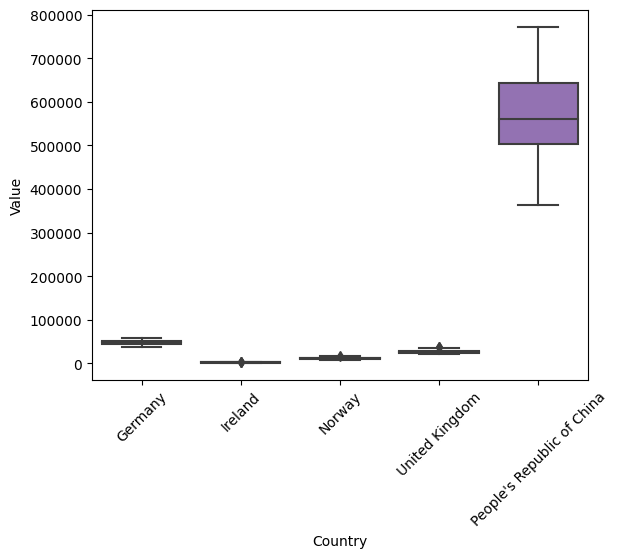

In [49]:
sns.boxplot(
    data = elec_countries_df[elec_countries_df['Balance'] == 'Net Electricity Production'],
    y = 'Value',
    x = 'Country',
);
plt.xticks(rotation = 45);

In [51]:
countries_df['Product'].value_counts()

Electricity                                   3690
Total Combustible Fuels                        690
Coal, Peat and Manufactured Gases              690
Oil and Petroleum Products                     690
Combustible Renewables                         690
Hydro                                          690
Wind                                           690
Total Renewables (Geo, Solar, Wind, Other)     690
Natural Gas                                    686
Other Combustible Non-Renewables               666
Solar                                          654
Not Specified                                  552
Nuclear                                        486
Geothermal                                     478
Other Renewables                               384
Name: Product, dtype: int64

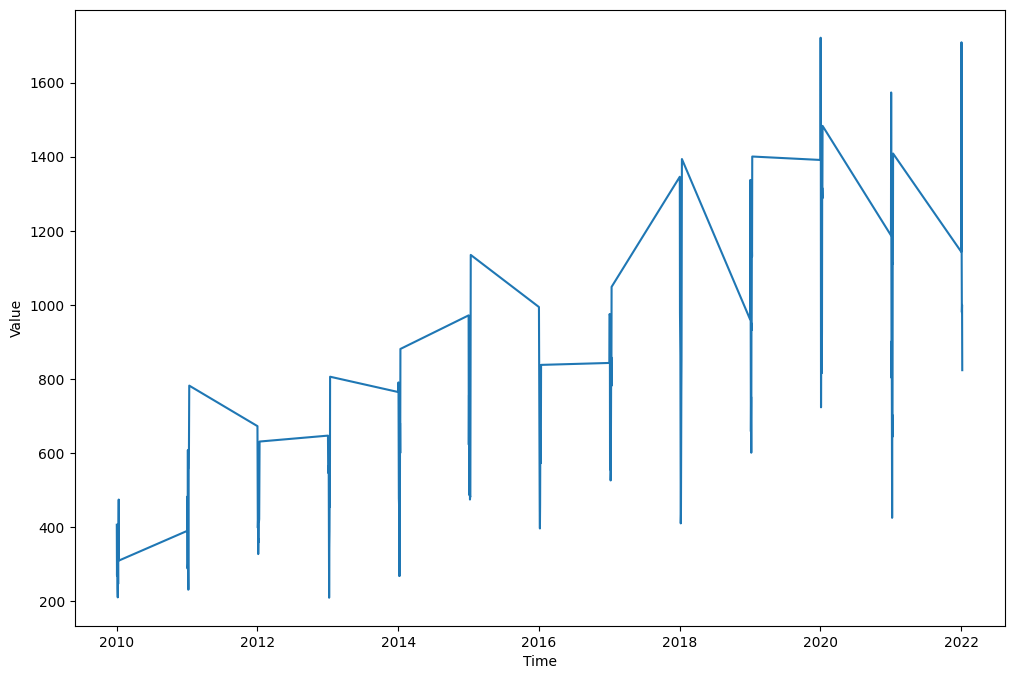

In [57]:
plt.figure(figsize=(12,8))
sns.lineplot(
    data = countries_df.query("Country == 'Ireland' & Product == 'Total Renewables (Geo, Solar, Wind, Other)'"),
    x = 'Time',
    y = 'Value'
);

There is a general upward trend in renewable energy generation in Ireland since 2012